In [95]:
import numpy as np
from matplotlib import pyplot as plt

In [96]:
l = 3
h1 = l / 20
h2 = l / 40
tau = 0.05
M = 50

In [97]:
def fi(x):
    return x*(1-np.exp(x-3))

def k(x):
    return x+0.6

def f(x,t):
    return 0

def g1(t):
    return 0

def g2(t):
    return 3**t-1

In [98]:
def implicit_scheme(fi, g1, g2, f, k, l, h, tau, M):
    
    N = int(l / h)

    x_values = np.linspace(0, l, N)
    t_values = np.linspace(0, 50*tau,M)
    
    U = np.zeros((M, N))
    U[:, 0] = g1(t_values)
    U[:, -1] = g2(t_values)
    U[0, :] = fi(x_values)

    
    A = np.zeros((N, N))
    A[0,0] = 1
    for i in range(1, N - 1):
        gamma = k(x_values[i])*tau / h**2
        A[i, i - 1] = gamma
        A[i, i] = -(1+2*gamma)
        A[i, i + 1] = gamma
    A[N-1,N-1] = 1

    

    for j in range(1, M):
        F = np.zeros(N)
        for i in range(1,N):
            F[i] = -U[j-1,i] - tau * f(x_values[i], t_values[j]) 
        F[0] = g1(t_values[j])
        F[-1] = g2(t_values[j])
        U[j,:] = np.linalg.solve(A, F)
     

    time_instances = [0,9,19, 29, 39, 49]

    fig, ax = plt.subplots(figsize = (12,10))

    ax.plot(x_values, U[time_instances[0], :], label=f"Момент времени {time_instances[0]}*τ")
    for i in range (1,len(time_instances)):
        ax.plot(x_values, U[time_instances[i], :], label=f"Момент времени {time_instances[i]+1}*τ")
    
    ax.set_title(f'Температурные профили для h = {h}')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('Температура', fontsize=12)
    ax.legend()
    plt.grid(True)
    plt.show()
    
    return U

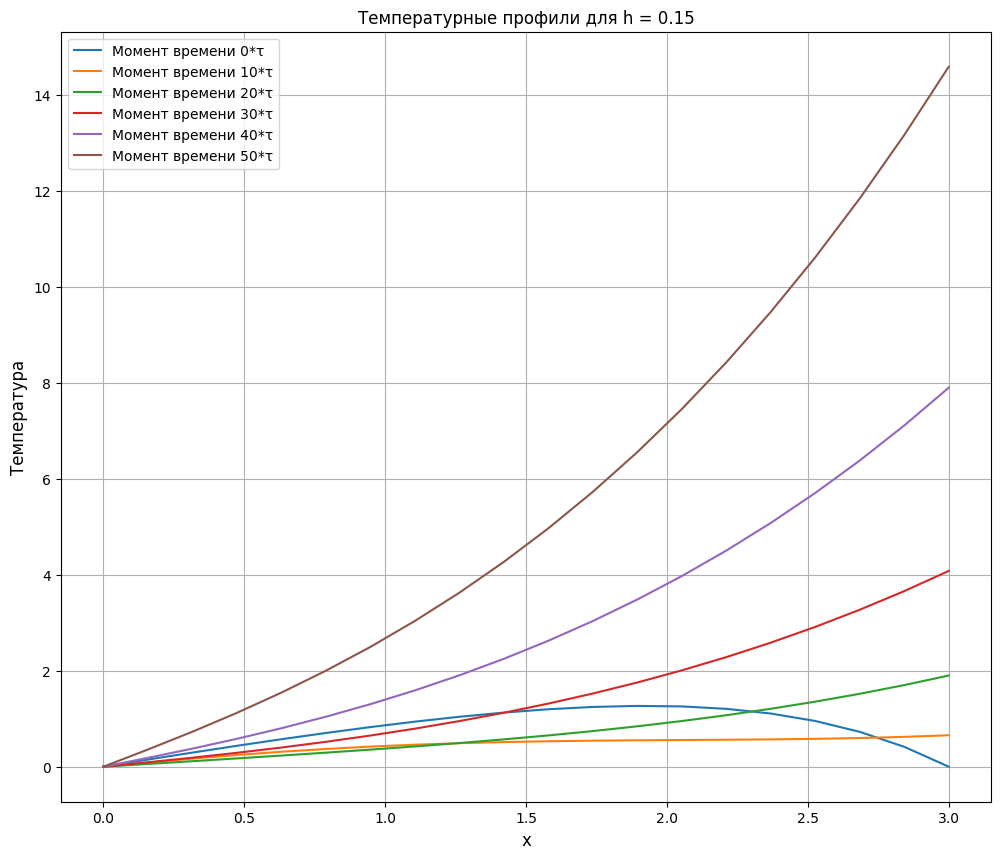

In [99]:
U_h1 = implicit_scheme(fi, g1, g2, f, k, l, h1, tau, M)

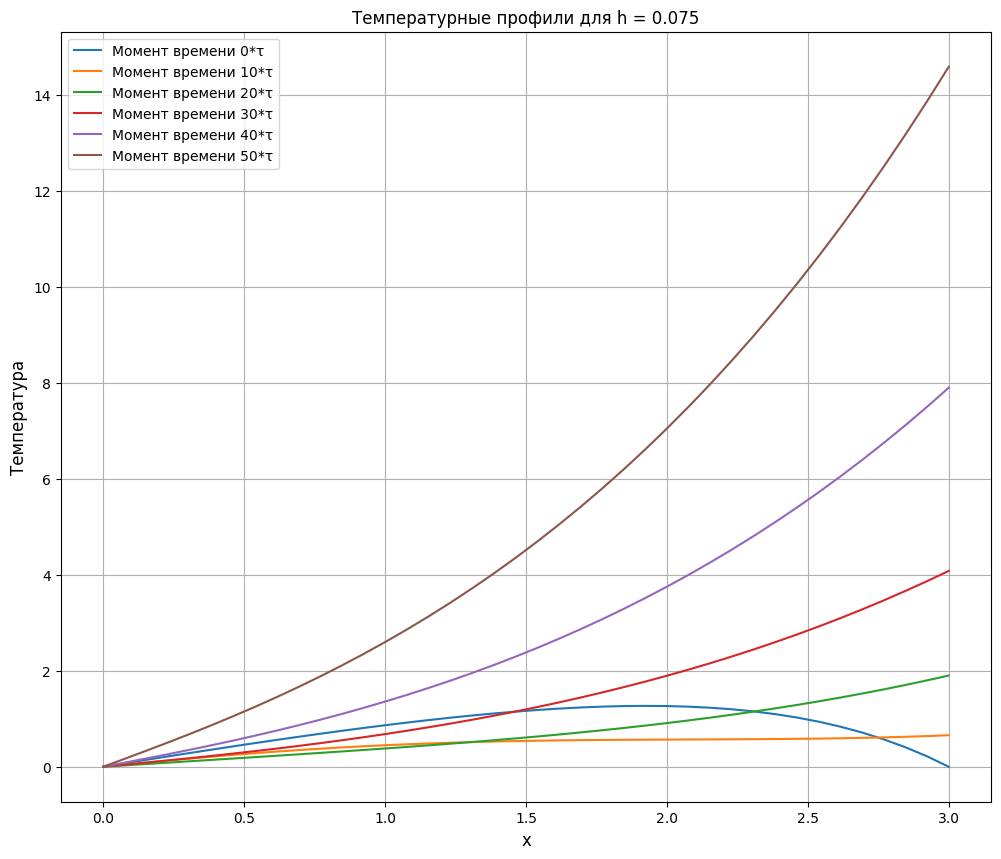

In [100]:
U_h2 = implicit_scheme(fi, g1, g2, f, k, l, h2, tau, M)

In [76]:
N = int(l / h1)
U_norm = 0
for i in range (N):
    U_norm += (U_h1[-1,i]-U_h2[-1,2*i])**2
error = np.sqrt(U_norm)
print(f"\nВеличина погрешности на 50-ом слое R = {error}\n")


Величина погрешности на 50-ом слое R = 1.6538092124765968

